Import dataset

In [1]:
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

print("Features:", iris.feature_names)
print("Target classes:", iris.target_names)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a Machine Learning Model

In [9]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)        # Transform test data (using training mean/std)

# 4. Train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

Evaluation matrix

In [10]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 0.37
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        10
  versicolor       0.00      0.00      0.00         9
   virginica       0.55      1.00      0.71        11

    accuracy                           0.37        30
   macro avg       0.18      0.33      0.24        30
weighted avg       0.20      0.37      0.26        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:

new_sample = [[5.1, 3.5, 1.4, 0.2]]
predicted_class = model.predict(new_sample)
print("Predicted class:", iris.target_names[predicted_class][0])

Predicted class: versicolor


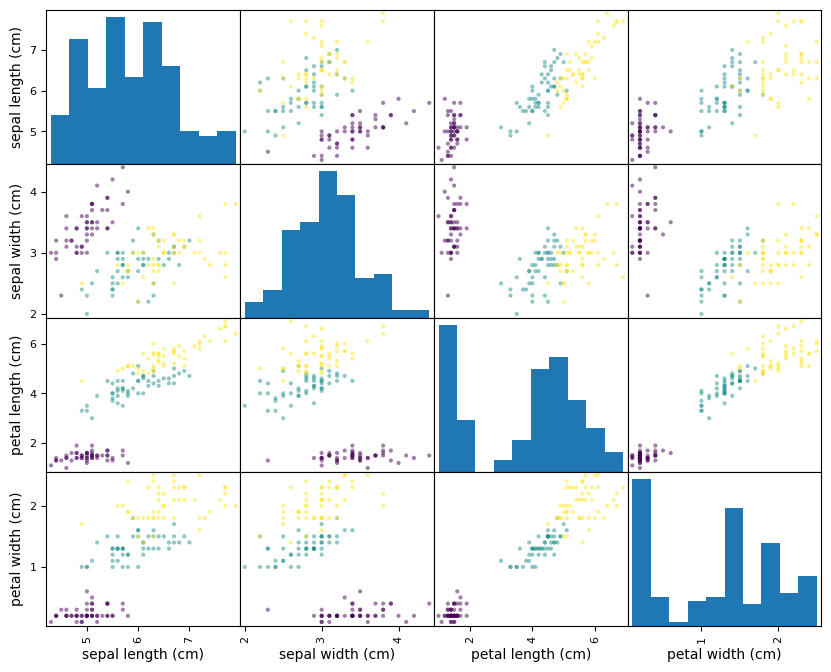

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

iris_df = pd.DataFrame(X, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=y, figsize=(10, 8))
plt.show()